In [84]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
import random

x, y = symbols('x y', real=True)
z = x**2 + y**2 + 1
z_x = z.diff(x)
z_y = z.diff(y)
print('Function: {}'.format(z))
print('dfdx    : {}'.format(z_x))
print('dfdy    : {}'.format(z_y))

f = lambdify([x, y], z, 'numpy')
df_dx = lambdify([x, y], z_x, 'numpy')
df_dy = lambdify([x, y], z_y, 'numpy')

def grad_vector(x,y):
    return np.array([df_dx(x,y), df_dy(x,y)])

Function: x**2 + y**2 + 1
dfdx    : 2*x
dfdy    : 2*y


In [85]:
def grad_descent(df,x_prev,learn_rate):
    
    epsilon = 0.0001
    grad_itter = 1
    
    seq_x = []
    seq_y = []
    plot_y = []

    if random.choice([True, False]):
      x_next = np.subtract(x_prev, learn_rate*grad_vector(x_prev[0], 0))
    else:
      x_next = np.subtract(x_prev, learn_rate*grad_vector(0 ,x_prev[1]))
    plot_y.append(np.sum(x_next - x_prev))
    seq_x = np.append(seq_x, x_next[0])
    seq_y = np.append(seq_y, x_next[1])
    
    while np.linalg.norm(np.subtract(x_next,x_prev)) > epsilon:
        
        x_prev = x_next
        if random.choice([True, False]):  
          x_next = x_prev - learn_rate*grad_vector(0,x_prev[1])
        else:
          x_next = x_prev - learn_rate*grad_vector(x_prev[0],0)
        plot_y.append(np.sum(x_next - x_prev))
        grad_itter += 1
        
        seq_x = np.append(seq_x, x_next[0])
        seq_y = np.append(seq_y, x_next[1])
    
    return (x_next, grad_itter, seq_x,seq_y, plot_y)

No handles with labels found to put in legend.


Minimum (x,y) from gradient descent: [4.66560000e-01 1.21871948e-04]
Number of gradient descent iterations: 24


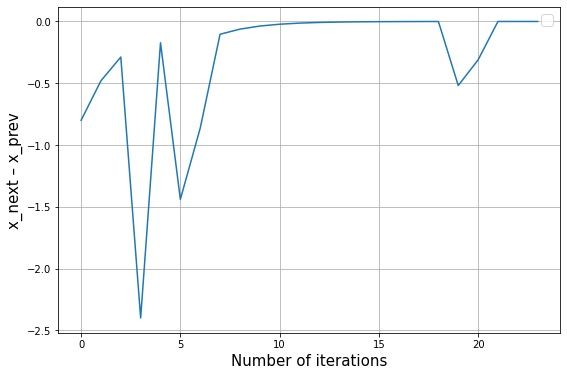

In [86]:
grad_output = grad_descent(grad_vector, np.array([6,2]), 0.2)

print('Minimum (x,y) from gradient descent: %s' %grad_output[0])
print('Number of gradient descent iterations: %s' %grad_output[1])
plot_x = list(range(0, grad_output[1]))

plt.figure(figsize=(9, 6))
plt.grid()
plt.plot(plot_x, grad_output[4])
plt.xlabel(u"Number of iterations",fontsize = 15)
plt.ylabel(u'x_next – x_prev',fontsize = 15)
plt.legend(fontsize = 15)
plt.show()


In [89]:
def Adam():
  alpha = 0.001
  beta1 = 0.9
  beta2 = 0.999
  epsilon = 0.0001 

  theta = [5, 5]
  theta_prev = [-1, -1]
  m = 0
  v = 0
  t = 0
  diffs = []

  while not np.allclose(np.asarray(theta), np.asarray(theta_prev)):
    t = t + 1
    g = grad_vector(theta[0], theta[1])
    m = beta1 * m + (1 - beta1) * g
    v = beta2 * v + (1 - beta2) * g**2
    m_ = m / (1 - beta1**t)
    v_ = v / (1 - beta2**t)
    theta_prev = theta
    theta = theta - alpha*m_ / (np.sqrt(v_) + epsilon)
    diffs.append(np.sum(theta-theta_prev))
  return theta, t, diffs

No handles with labels found to put in legend.


Minimum (x,y) Adam: [1.33812224e-06 1.33812224e-06]
Number of Adam iterations: 10417


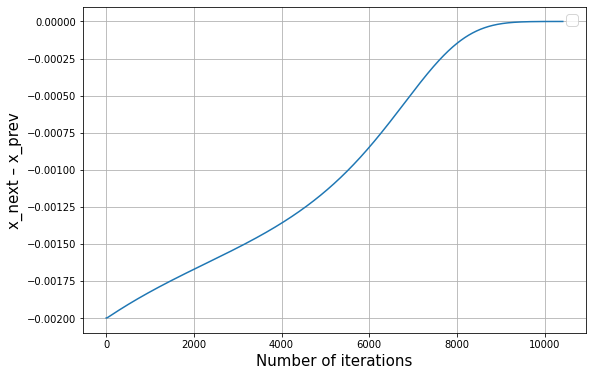

In [90]:
adam_output = Adam()
print('Minimum (x,y) Adam: %s' %adam_output[0])
print('Number of Adam iterations: %s' %adam_output[1])

plot_x = list(range(0, adam_output[1]))

plt.figure(figsize=(9, 6))
plt.grid()
plt.plot(plot_x, adam_output[2])
plt.xlabel(u"Number of iterations",fontsize = 15)
plt.ylabel(u'x_next – x_prev',fontsize = 15)
plt.legend(fontsize = 15)
plt.show()